## Problelm statement

Download the following customer dataset from below link:
Data Set: https://www.kaggle.com/shwetabh123/mall-customers
        
This dataset givesthe data of Income and money spent by the customers visiting a Shopping Mall.
The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as
a mall owner you need to find the group of people who are the profitable customers for the mall
owner. Apply at least two clustering algorithms (based on Spending Score) to find the group of
customers.

a. Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if
necessary.

b. Perform data-preparation( Train-Test Split)

c. Apply Machine Learning Algorithm

d. Evaluate Model.

e. Apply Cross-Validation and Evaluate Model

## Loading Dataset

In [24]:
# Importing required Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
# Loading data
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Analyzing Dataset

In [26]:
# Shape of Data
df.shape

(200, 5)

In [27]:
# Features of Dataset
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
# Desscription of Dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
# Finding null values 
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Finding correalation between the data


In [31]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


## Visualizing the Data

<AxesSubplot:>

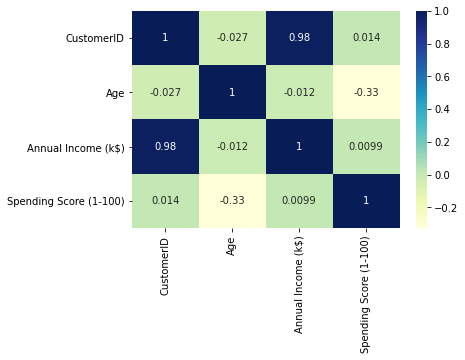

In [32]:
# Visualizing correlation between features
sns.heatmap(df.corr(),annot = True,cmap='YlGnBu')

 ## Finding Optimum number of cluster for K-Means (Using Elbow Method)

In [38]:
# Finding the optimum number of clusters for K-Means Classification

x = df.iloc[:,[3,4]].values
               
from sklearn.cluster import KMeans
wcss = []
print(f"Sum of squared Error :")
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init="k-means++",random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(f"wcss {i} : {kmeans.inertia_}")


Sum of squared Error :
wcss 1 : 269981.28000000014
wcss 2 : 181363.59595959607
wcss 3 : 106348.37306211119
wcss 4 : 73679.78903948837
wcss 5 : 44448.45544793369
wcss 6 : 37233.81451071002
wcss 7 : 30259.657207285458
wcss 8 : 25011.839349156595
wcss 9 : 21850.16528258562
wcss 10 : 19672.07284901432


Text(0, 0.5, 'Sum of Squared Error')

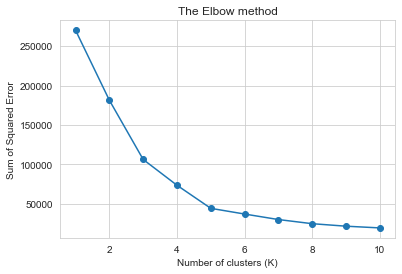

In [40]:
# Plotting result on graph to find elbow point
sns.set_style("whitegrid")
plt.plot(range(1,11),wcss,marker = "o")
plt.title("The Elbow method")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Sum of Squared Error")

## Model building and Training

In [41]:
# as we have got elbow point 3 we will select k=3 to train the model

# creating k-means classifier
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=42,max_iter=300)

# Predicting output for each data point
y_pred = kmeans.fit_predict(x) 

y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [43]:
# checking that which species are in which cluster
df["cluster"] = y_pred
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


In [42]:
# Centroid of each cluster
centroid = kmeans.cluster_centers_
print(centroid)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


## Visualization of cluster

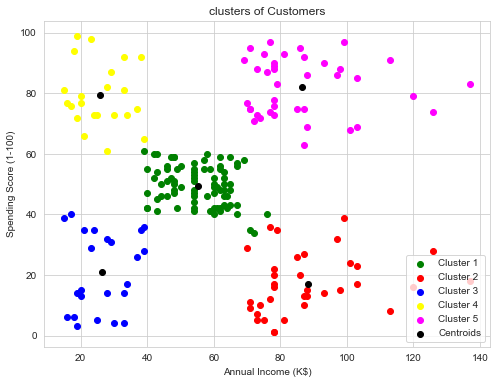

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],color = "green",label = "Cluster 1")
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],color = "red",label = "Cluster 2")
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],color = "blue",label = "Cluster 3")
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],color = "yellow",label = "Cluster 4")
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],color = "magenta",label = "Cluster 5")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "BLack",label = "Centroids")

plt.title("clusters of Customers")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score (1-100)")

plt.legend(loc = "lower right")